# Ground motion IW1 and IW2 data 

Combine the data `160-IW1-414-s1-asc1-v2020.csv` and `160-IW2-414-s1-asc1-v2020.csv`. Not sure what the differences are so having a look.

SPOILER: the datasets are extremely similar, they just differ in the mode of acquisition but the points are pretty much undistinguishable...

In [2]:
# import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np


In [3]:
gm_csv = pd.read_csv('./tmp2/160-IW1-414-s1-asc1-v2020.csv')

In [4]:
# remove whitespaces from column names 
gm_csv.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
#transposer - rowes are columns and vice versa
gm_csv_t = gm_csv.T

In [6]:
# set the 'pid' as the column name
gm_csv_t.rename(columns=gm_csv_t.iloc[0], inplace=True)

In [7]:
#remove all rows which are not dates - first date is on entry #21
gm_csv_t_dates= gm_csv_t.iloc[21: , :]

In [8]:
#need to make a copy of the dataframe so that I don't mess it up
gm_copy = gm_csv_t_dates.copy()

In [30]:
gm_csv_2 = pd.read_csv('./tmp2/160-IW2-414-s1-asc1-v2020.csv')
# remove whitespaces from column names 
gm_csv_2.rename(columns=lambda x: x.strip(), inplace=True)
#transposer - rowes are columns and vice versa
gm_csv_t_2 = gm_csv_2.T
gm_csv_t_2.rename(columns=gm_csv_t_2.iloc[0], inplace=True)
gm_csv_t_dates_2= gm_csv_t_2.iloc[21: , :]

In [41]:
# join both datasets in the column dimension
full_gm_dataset = pd.concat([gm_csv_t_dates, gm_csv_t_dates_2], axis=1)

In [42]:
full_gm_dataset

,1398606531743094,1398606531775866,1398606531808630,1398606531808634,1398606531841402,1398606531874163,1398606531874169,1398606531874170,1398606531906937,1398606531906938,...,1398881402716178,1398881402716184,1398881402748953,1398881402748954,1398881402748965,1398881402880022,1398881402880023,1398881402912790,1398881402912791,1398881402912792
20141004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20150601,2.95,8.12,14.91,5.49,1.84,-0.19,8.95,7.56,6.86,4.6,...,8.45,-4.74,-2.57,-5.46,-7.02,8.5,5.25,9.08,-11.27,-8.61
20150613,-8.52,9.88,-7.66,9.27,13.73,-18.68,-10.2,16.09,-6.57,10.78,...,-2.17,-12.76,-16.66,6.32,-3.46,-0.76,1.11,1.8,-11.55,-13.4
20150625,-5.99,2.67,5.27,4.45,-3.49,0.74,0.07,-1.16,2.18,-3.05,...,8.4,-16.0,-15.72,2.51,-9.06,8.51,3.11,7.55,5.17,-11.96
20150707,-2.23,10.62,14.08,-3.77,-2.8,-11.93,-4.34,9.97,1.3,5.52,...,0.91,-6.72,-5.11,-5.37,-10.19,-2.74,-2.22,0.96,-3.97,-4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201002,1.48,9.46,-2.11,10.49,9.65,-1.56,8.91,12.84,11.98,9.68,...,7.33,-6.63,-5.24,-8.18,-3.72,7.56,6.15,11.87,8.99,8.58
20201008,-0.93,10.04,10.44,9.02,8.11,-0.71,3.81,9.95,5.77,7.09,...,6.72,-3.66,-7.01,-9.29,-1.97,8.65,5.9,16.59,9.6,2.49
20201014,-4.52,-5.44,-0.03,-1.52,8.76,-11.5,7.2,10.9,10.64,6.87,...,12.14,-9.49,-6.97,-8.39,-4.43,11.53,6.0,11.3,8.7,0.51
20201020,-1.01,11.57,4.22,1.96,3.87,1.64,-3.51,-2.01,-1.02,-5.18,...,4.53,-21.17,-13.66,-14.6,-12.1,15.98,-0.87,11.8,2.8,2.47


### Linear regression on timeseries - what are the trends that we are trying to pick up??

Same analysis as previously but just with the concatenated expanded data

* Ascending, descending, constant or irregular
* Seasonality trends

http://kdd.ics.uci.edu/databases/synthetic_control/synthetic_control.data.html

We could potentially use this data to pretrain an algorithm?
https://www.andreaperlato.com/tspost/time-series-classification/

In [43]:
pd.to_datetime(full_gm_dataset.index)

DatetimeIndex(['2014-10-04', '2015-06-01', '2015-06-13', '2015-06-25',
               '2015-07-07', '2015-07-19', '2015-07-31', '2015-08-12',
               '2015-08-24', '2015-09-05',
               ...
               '2020-09-02', '2020-09-08', '2020-09-14', '2020-09-20',
               '2020-09-26', '2020-10-02', '2020-10-08', '2020-10-14',
               '2020-10-20', '2020-10-26'],
              dtype='datetime64[ns]', length=130, freq=None)

In [44]:
# create a new column with the timestep number to make it easier to work with instead of dates

df = full_gm_dataset.copy()
df['timeseries_step'] = np.arange(0, len(full_gm_dataset))

In [45]:
first_column = df.pop('timeseries_step')

In [46]:
df.insert(0, 'timeseries_step', first_column)

In [47]:
df.head(5)

,timeseries_step,1398606531743094,1398606531775866,1398606531808630,1398606531808634,1398606531841402,1398606531874163,1398606531874169,1398606531874170,1398606531906937,...,1398881402716178,1398881402716184,1398881402748953,1398881402748954,1398881402748965,1398881402880022,1398881402880023,1398881402912790,1398881402912791,1398881402912792
20141004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20150601,1,2.95,8.12,14.91,5.49,1.84,-0.19,8.95,7.56,6.86,...,8.45,-4.74,-2.57,-5.46,-7.02,8.5,5.25,9.08,-11.27,-8.61
20150613,2,-8.52,9.88,-7.66,9.27,13.73,-18.68,-10.2,16.09,-6.57,...,-2.17,-12.76,-16.66,6.32,-3.46,-0.76,1.11,1.8,-11.55,-13.4
20150625,3,-5.99,2.67,5.27,4.45,-3.49,0.74,0.07,-1.16,2.18,...,8.4,-16.0,-15.72,2.51,-9.06,8.51,3.11,7.55,5.17,-11.96
20150707,4,-2.23,10.62,14.08,-3.77,-2.8,-11.93,-4.34,9.97,1.3,...,0.91,-6.72,-5.11,-5.37,-10.19,-2.74,-2.22,0.96,-3.97,-4.94


Can we just do a simple linear regression on the data??

In [ ]:
from scipy import stats
all_y_reg = []
for i in range(1,len(df.columns)):
    X = df.loc[:, ['timeseries_step']]  # features
    y = df.iloc[:, i]  # target
    x = X.values.squeeze()
    x = x.astype(float)
    y = y.values.astype(float)
    res = stats.linregress(x, y)
    all_y_reg.append(res)


In [49]:
# we want to check for the r value - the closer it is to 1 (or -1 if the correlation is negative), 
# the better the regression fit is.
all_y_reg[1].intercept

0.8866470996607636

In [50]:
all_y_reg[1]

LinregressResult(slope=0.05103349726626839, intercept=0.8866470996607636, rvalue=0.3584498363672077, pvalue=2.8203879319248326e-05, stderr=0.01174786839476263, intercept_stderr=0.8766539312769664)

In [51]:
# note that the order follows thst of the dataframe columns
all_rvalue = []
all_slope_values = []
all_intercept_values = []
all_pvalue = []
all_stderr = []
all_intercept_stderr = []

for i in range(len(all_y_reg)):
    all_rvalue.append(all_y_reg[i].rvalue)
    all_slope_values.append(all_y_reg[i].slope)
    all_intercept_values.append(all_y_reg[i].intercept)
    all_pvalue.append(all_y_reg[i].pvalue)
    all_stderr.append(all_y_reg[i].stderr)
    all_intercept_stderr.append(all_y_reg[i].intercept_stderr)

    

In [54]:
# create a pandas dataframe with the r values and the same column names (point IDs) as the original dataframe
df_all_rvalue = pd.DataFrame(all_rvalue)
#df_all_rvalue = df_all_rvalue.T
df_all_rvalue.index = full_gm_dataset.columns

In [55]:
df_all_rvalue['slope'] = all_slope_values

In [56]:
df_all_rvalue['intercept'] = all_intercept_values
df_all_rvalue['pvalue'] = all_pvalue
df_all_rvalue['stderr'] = all_stderr
df_all_rvalue['intercept_stderr'] = all_intercept_stderr
df_all_rvalue = df_all_rvalue.rename(columns={0: 'rvalue'})

In [57]:
df_all_rvalue.index.name = 'pid'

In [58]:
df.to_csv('timeseries_data_large_region.csv', index=True)

In [59]:
# save all the values in a csv file 

df_all_rvalue.to_csv('regression_values_large_region.csv', index=True)


In [60]:
df_linreg = df_all_rvalue

In [61]:
df_linreg.rvalue.iloc[0]

0.3480209112027619

In [62]:
df_linreg.index[0]

1398606531743094

In [63]:
linear_ascending = []
linear_descending = []
linear_constant = []
irregular = []

for i in range(len(df_linreg)):
    if df_linreg.rvalue.iloc[i]>0.9:
        linear_ascending.append(df_linreg.index[i])
    elif df_linreg.rvalue.iloc[i]<-0.9:
        linear_descending.append(df_linreg.index[i])
    elif (df_linreg.rvalue.iloc[i]<0.025 and df_linreg.rvalue.iloc[i]>-0.025) and (-0.01<df_linreg.slope.iloc[i]<0.01):
    #elif (-0.01<df_linreg.slope.iloc[i]<0.01):
        linear_constant.append(df_linreg.index[i])
    else:
        irregular.append(df_linreg.index[i])

In [64]:
print(f'ascending: {len(linear_ascending)}, descending: {len(linear_descending)},\
constant: {len(linear_constant)}, irregular:{len(irregular)}')

ascending: 55, descending: 1480,constant: 643, irregular:27326


In [66]:
df_all_rvalue['reg_type'] = ""

In [67]:
for i in range(len(linear_ascending)):
    df_all_rvalue.reg_type.loc[linear_ascending[i]] = 'ascending'

/tmp/ipykernel_976908/940306209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_rvalue.reg_type.loc[linear_ascending[i]] = 'ascending'


In [68]:
for i in range(len(linear_descending)):
    df_all_rvalue.reg_type.loc[linear_descending[i]] = 'descending'

/tmp/ipykernel_976908/2814639489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_rvalue.reg_type.loc[linear_descending[i]] = 'descending'


In [69]:
for i in range(len(linear_constant)):
    df_all_rvalue.reg_type.loc[linear_constant[i]] = 'constant'

/tmp/ipykernel_976908/94681015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_rvalue.reg_type.loc[linear_constant[i]] = 'constant'


In [70]:
for i in range(len(irregular)):
    df_all_rvalue.reg_type.loc[irregular[i]] = 'irregular'

/tmp/ipykernel_976908/724804538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_rvalue.reg_type.loc[irregular[i]] = 'irregular'


In [71]:
df_all_rvalue.to_csv('regression_values_large_region.csv')

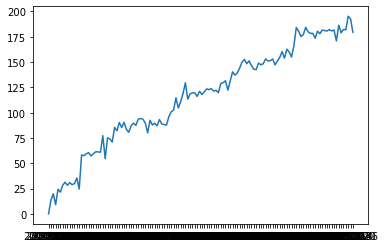

In [75]:
#ascending example
plt.plot(gm_csv_t_dates.index, gm_csv_t_dates[linear_ascending[0]])
#plt.plot(gm_csv_t_dates.index, )

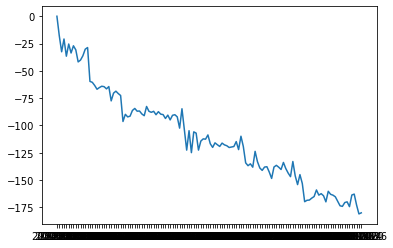

In [73]:
plt.plot(gm_csv_t_dates.index, gm_csv_t_dates[linear_descending[0]])


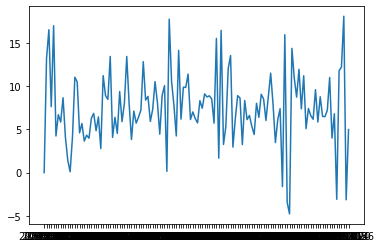

In [74]:
plt.plot(gm_csv_t_dates.index, gm_csv_t_dates[linear_constant[0]])


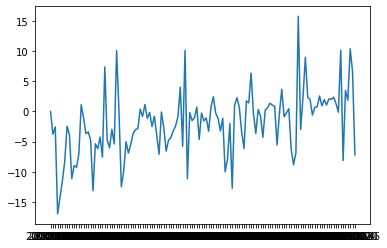

In [76]:
plt.plot(gm_csv_t_dates.index, gm_csv_t_dates[irregular[110]])


In [276]:
gm_csv_t_dates.head()

,1398606531743094,1398606531775866,1398606531808630,1398606531808634,1398606531841402,1398606531874163,1398606531874169,1398606531874170,1398606531906937,1398606531906938,...,1398606540229919,1398606540262687,1398606540262688,1398606540262691,1398606540295456,1398606540295458,1398606540295459,1398606540328228,1398606540360995,1398606540360996
20141004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20150601,2.95,8.12,14.91,5.49,1.84,-0.19,8.95,7.56,6.86,4.6,...,-3.25,5.33,-7.09,-12.46,-3.85,3.99,-11.58,3.79,4.89,2.12
20150613,-8.52,9.88,-7.66,9.27,13.73,-18.68,-10.2,16.09,-6.57,10.78,...,2.52,7.0,2.14,-1.66,3.09,3.22,2.35,-2.13,4.16,-1.61
20150625,-5.99,2.67,5.27,4.45,-3.49,0.74,0.07,-1.16,2.18,-3.05,...,-4.6,-1.0,-10.65,-13.19,-13.43,-7.36,-9.88,-1.87,5.12,-3.3
20150707,-2.23,10.62,14.08,-3.77,-2.8,-11.93,-4.34,9.97,1.3,5.52,...,-2.53,2.77,-3.14,-3.77,-1.31,1.07,0.06,1.35,2.47,2.75


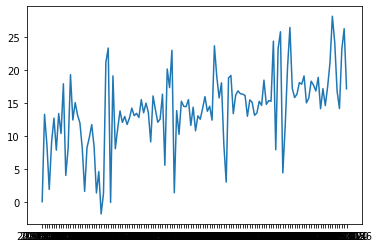

In [38]:
plt.plot(gm_csv_t_dates.iloc[:,534])

In [39]:
import scipy.fft
# fourier transform decomposition to analise seasonality trends
# take only the first row of our timeseries
sp = scipy.fft.fft((gm_csv_t_dates.iloc[:,534]))

In [26]:
len(sp[:N//2])

65

In [27]:
130//2

65

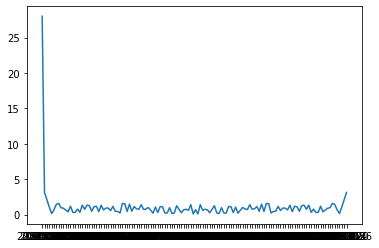

In [40]:
N = len(gm_csv_t_dates)
fig, ax = plt.subplots()
ax.plot(gm_csv_t_dates.index, 2.0/N * np.abs(sp[:N]))
plt.show()

In [57]:
import datetime
dates = pd.to_datetime(gm_csv_t_dates.index)

In [61]:
all_delta = []
for i in range(len(dates)-1):
    d0 = dates[i]
    d1 = dates[i+1]
    delta = d1 - d0
    all_delta.append(delta)


In [65]:
plt.plot_date(all_delta)

TypeError: plot_date() missing 1 required positional argument: 'y'

In [63]:
plt.hist(int(all_delta))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

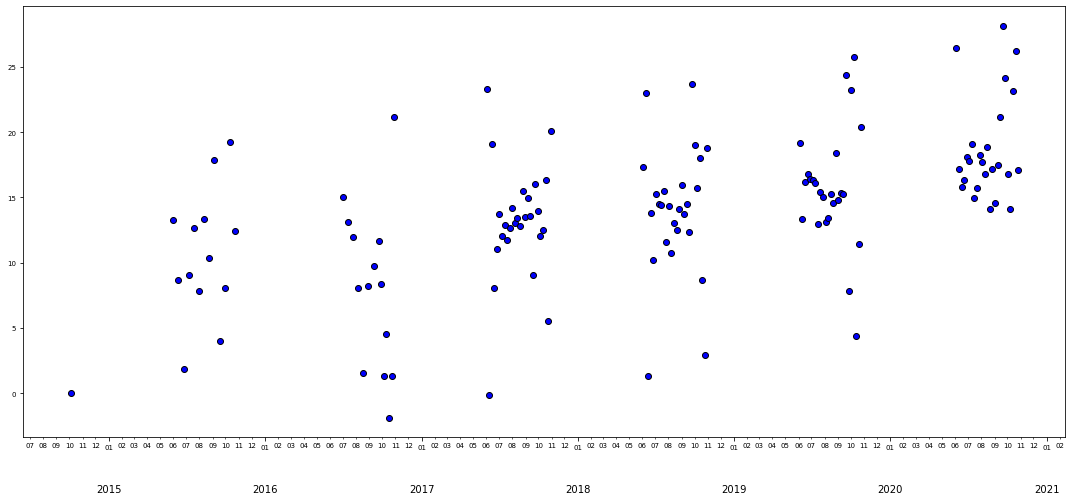

In [85]:
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
# plt.plot(gm_csv_t_dates.iloc[:20,534],'.-')


import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib import dates as mdates

# Using Data from OP: tp_pass and azip_pass

# Creating your plot

fig, ax=plt.subplots(1, 1, figsize=(15, 7))

#ax.set_ylim(-185, 185)
ax.scatter(dates, gm_csv_t_dates.iloc[:,534], color="b", alpha=1.0, ec="k")

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
# Minor ticks every year.
fmt_year = mdates.YearLocator()

ax.xaxis.set_minor_locator(fmt_month)
# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))

# fontsize for month labels
ax.tick_params(labelsize=7, which='both')
# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, labelsize=10)

#plt.yticks([-180, -120, -60, 0, 60, 120, 180], ["${}^\circ$".format(x) for x in [-180, -120, -60, 0, 60, 120, 180]], fontsize=35)
plt.tight_layout()
plt.show()